In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

In [2]:
df = pd.read_csv('data/diabetes.csv')
df.shape

(768, 9)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


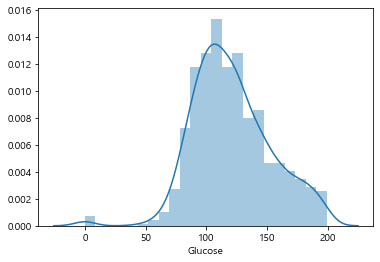

In [8]:
sns.distplot(df['Glucose'])

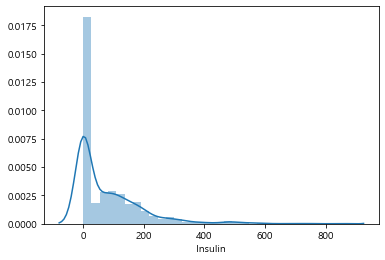

In [9]:
sns.distplot(df['Insulin'])

In [10]:
zero_features=['Glucose','BloodPressure','SkinThickness','Insulin']

In [11]:
df['Glucose'].count()

768

In [12]:
df[df['Glucose']==0]['Glucose'].count()/df['Glucose'].count()

0.006510416666666667

In [13]:
for i in zero_features:
    a=df[i].count()
    b=df[df[i]==0][i].count()
    print('{0}의 0건수는 {1}, 퍼센트는 {2:.2f} %'.format(i,b,b/a*100))

Glucose의 0건수는 5, 퍼센트는 0.65 %
BloodPressure의 0건수는 35, 퍼센트는 4.56 %
SkinThickness의 0건수는 227, 퍼센트는 29.56 %
Insulin의 0건수는 374, 퍼센트는 48.70 %


In [14]:
zero_features1=['Glucose','BloodPressure','SkinThickness']

In [15]:
for i in zero_features1:
    mean=df[i].mean()
    df[i] = df[i].replace(0,mean)

In [16]:
df_fill=df.copy()

In [17]:
test = df[df['Insulin']==0].copy()

In [18]:
train = df[df['Insulin']!=0].copy()

In [19]:
iqr3 = train['Insulin'].quantile(0.75)
iqr1 = train['Insulin'].quantile(0.25)

In [20]:
iqr = iqr3-iqr1

In [21]:
out = iqr*1.5+iqr3

In [22]:
out

360.625

In [23]:
train.shape

(394, 9)

In [24]:
train = train[train['Insulin']<out]

In [25]:
train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [26]:
y1_train=train['Insulin']

In [27]:
x1_train=train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

In [28]:
y1_test=test['Insulin']

In [29]:
x1_test=test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rfr_model = RandomForestRegressor()

In [32]:
rfr_model.fit(x1_train,y1_train)

RandomForestRegressor()

In [33]:
y1_pred = rfr_model.predict(x1_test)

In [34]:
y1_pred.tolist()

[177.02,
 49.02,
 165.82,
 102.13,
 162.7,
 118.27,
 156.45,
 199.17,
 158.44,
 89.65,
 108.95,
 111.15,
 213.69,
 124.87,
 212.21,
 120.62,
 162.68,
 59.98,
 111.0,
 153.13,
 164.82,
 84.77,
 163.25,
 96.31,
 147.19,
 177.2,
 184.49,
 50.73,
 143.33,
 86.18,
 64.44,
 191.98,
 57.02,
 145.0,
 53.81,
 130.31,
 74.72,
 143.71,
 161.14,
 163.94,
 53.13,
 104.83,
 61.34,
 95.23,
 178.9,
 102.13,
 97.82,
 45.36,
 121.89,
 182.98,
 157.33,
 120.58,
 52.11,
 170.8,
 96.21,
 206.76,
 162.83,
 105.45,
 85.96,
 70.64,
 53.26,
 249.26,
 137.65,
 65.2,
 93.23,
 119.64,
 154.36,
 106.63,
 145.32,
 164.2,
 91.59,
 183.78,
 111.77,
 136.18,
 136.44,
 102.6,
 51.1,
 230.39,
 57.49,
 93.43,
 213.74,
 213.15,
 153.04,
 82.41,
 167.53,
 207.39,
 120.58,
 119.79,
 122.16,
 67.33,
 84.53,
 194.87,
 167.36,
 49.29,
 46.86,
 128.96,
 224.48,
 94.63,
 176.08,
 169.89,
 69.74,
 117.08,
 138.91,
 190.8,
 120.53,
 111.69,
 204.99,
 231.83,
 52.05,
 186.18,
 230.53,
 76.26,
 158.53,
 229.09,
 106.48,
 115.54,
 19

In [35]:
df_fill.loc[df['Insulin']==0,'Insulin']=y1_pred.tolist()

In [36]:
df_fill

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,177.02,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,49.02,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,165.82,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.00,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.00,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.00,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,177.09,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.00,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,127.23,30.1,0.349,47,1


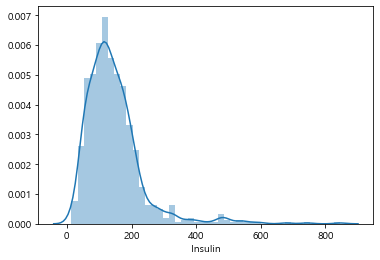

In [38]:
sns.distplot(df_fill['Insulin'])

In [39]:
df_fill.to_csv('data/diabetes_fill_insulin.csv',index=False)